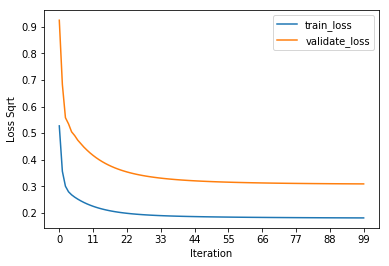

In [1]:
# write your code here
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# 读取数据集
mem=Memory('./mycache')
@mem.cache
def get_data():
    data=load_svmlight_file('../data/housing_scale')
    return data[0],data[1]

# 划分数据集
x,y=get_data()
y=y.reshape(506,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# 参数初始化过程
loss=[]
loss_validate=[]
ranges=range(0,100)
w=np.random.rand(13,1)    # 初始化权重
yita=0.001    # 学习率
reg=0.00001    # lambda
# 以下是梯度下降过程
tmp1=x_train.T*y_train
for i in ranges:
    tmp2=x_train*w
    grad=reg*w+tmp1-x_train.T*tmp2
    w+=yita*grad
    # 算loss值
    computed=[]
    for j in range(0,x_train.shape[0]):
        computed.append(((y_train[j]-x_train[j]*w)**2).reshape(1))
    loss.append(np.sqrt(0.5*sum(computed))/len(y_train))
    computed=[]
    for j in range(0,x_test.shape[0]):
        computed.append(((y_test[j]-x_test[j]*w)**2).reshape(1))
    loss_validate.append(np.sqrt(0.5*sum(computed))/len(y_test))
    
# 可视化实验结果
import matplotlib.pyplot as plt
figure1,=plt.plot(ranges,loss)
figure2,=plt.plot(ranges,loss_validate)
plt.xlabel('Iteration')
plt.ylabel('Loss Sqrt')
plt.xticks(np.linspace(0, 99, 10))
plt.legend(handles=[figure1,figure2], labels=['train_loss','validate_loss'], loc='best')
plt.show()

In [114]:
((y_train[0]-x_train[0]*w)**2).reshape(1).shape

(1,)

In [146]:
len(range(0,10))

10

In [38]:
np.transpose(w).shape

(1, 13)

In [12]:
loss[9999]

array([ 64.60430542])